<a href="https://colab.research.google.com/github/HanifRafandi014/3D_Machine_Learning/blob/main/Kuis1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama Anggota Kelompok :

1. Afdhol Affanuddin(2141720253 / 01)

2. Brilliyand Noval Herdana Putra (2141720 / 12)

3. Hanif Naufal Rafandi (2141720127 / 14)

Kelas : 3D

Quiz Machine Learning 1

**Import Library**

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from collections import Counter
from imblearn.over_sampling import SMOTE

**Load Data**

In [45]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(int)
print(mnist.DESCR)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

**Melakukan Slice Data**

In [46]:
# Melakukan Slice Data
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

# 1. Memastikan Data Imbalance pada Dataset MNIST yang digunakan

**Memeriksa Data yang Imbalance**

In [47]:
mnist_data = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
mnist_data['target'] = mnist.target.astype(int) #menambahkan kolom target sebagai label

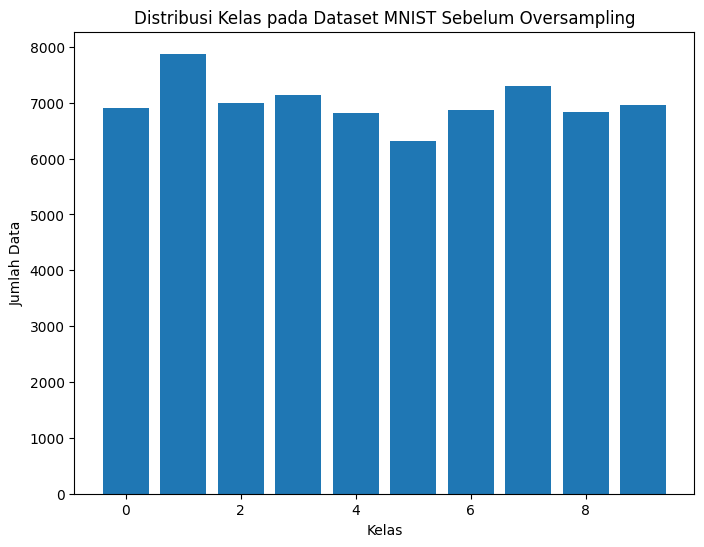

In [48]:
# Memeriksa Ketidakseimbangan Data
# Hitung jumlah data per kelas
class_counts = np.bincount(y)

# Tampilkan distribusi kelas sebelum oversampling
plt.figure(figsize=(8, 6))
plt.bar(range(len(class_counts)), class_counts)
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Kelas pada Dataset MNIST Sebelum Oversampling")
plt.show()

**Menyeimbangkan Data antara X dan y / Balancing Data**

In [49]:
# Menggunakan SMOTE untuk oversampling
smote = SMOTE(random_state=100)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [50]:
# Menghitung jumlah kelas setelah oversampling
class_count_resampled = Counter(y_resampled)
print(class_count_resampled)

Counter({5: 7877, 0: 7877, 4: 7877, 1: 7877, 9: 7877, 2: 7877, 3: 7877, 6: 7877, 7: 7877, 8: 7877})


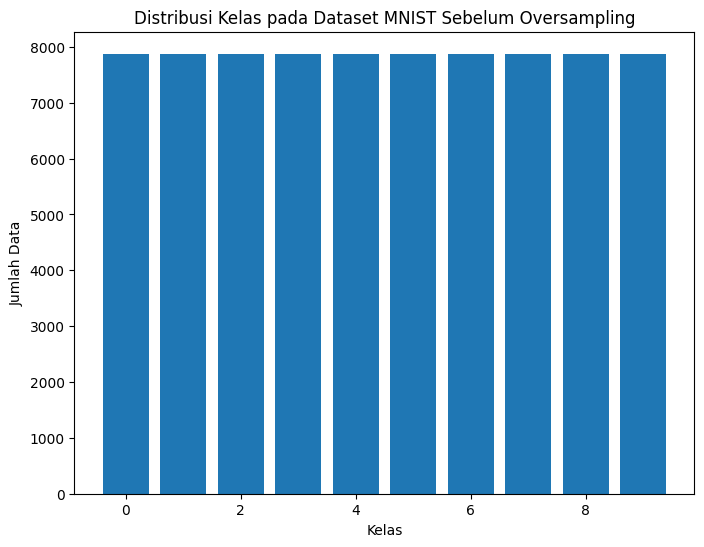

In [51]:
# Memeriksa Ketidakseimbangan Data
# Hitung jumlah data per kelas
class_counts_resampled = np.bincount(y_resampled)

# Tampilkan distribusi kelas sebelum oversampling
plt.figure(figsize=(8, 6))
plt.bar(range(len(class_counts_resampled)), class_counts_resampled)
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Kelas pada Dataset MNIST Sebelum Oversampling")
plt.show()

**Kesimpulan :**

# 2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya

**Mengambil 15 Data Gambar beserta Labelnya**

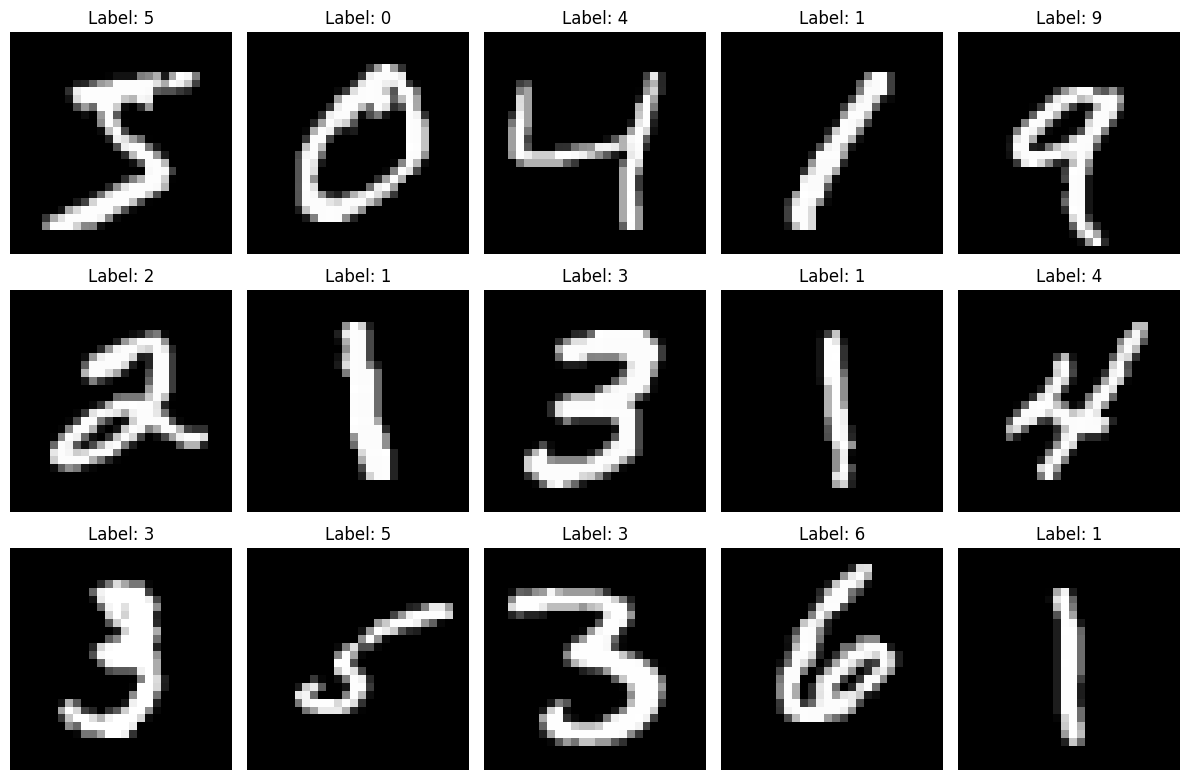

In [52]:
# Ambil 15 gambar pertama dan labelnya
images = X[:15]
labels = y[:15]

# Tentukan dimensi subplot
num_rows = 3
num_cols = 5

# Buat subplot untuk setiap gambar
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        ax = axes[i, j]
        image = images[index].reshape(28, 28)  # Reshape gambar ke dimensi asli (28x28)
        label = labels[index]

        # Tampilkan gambar
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Label: {label}")
        ax.axis('off')

plt.tight_layout()
plt.show()

**Kesimpulan :**

# 3. Lakukan proses ekstraksi ¦tur pada data MNIST seperti histogram, PCA, atau yang lainnya

**Ekstraksi fitur pada data MNIST dengan histogram**

In [54]:
# Import Modul yang Diperlukan dan Muat Dataset MNIST
from skimage.feature import hog
from sklearn.decomposition import PCA

# Inisialisasi daftar untuk menyimpan fitur HOG
hog_features = []

# Ekstraksi fitur HOG untuk setiap citra
for img in X:
    # Hitung fitur HOG untuk setiap citra
    features, hog_image = hog(img.reshape(28, 28), pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    hog_features.append(features)

# Ubah daftar fitur HOG menjadi numpy array
hog_features = np.array(hog_features)

**Visualisasi dengan Histogram**

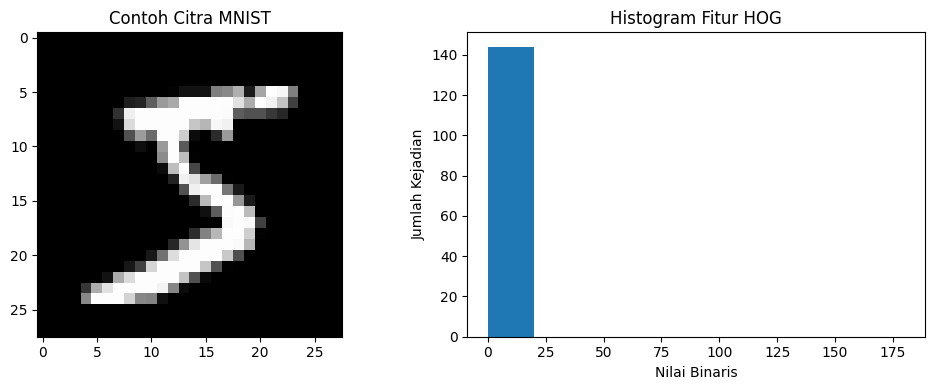

In [55]:
# Visualisasikan fitur HOG sebagai histogram
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(X[0].reshape(28, 28), cmap='gray')
plt.title('Contoh Citra MNIST')

plt.subplot(1, 2, 2)
plt.hist(hog_features[0], bins=9, range=(0, 180))
plt.title('Histogram Fitur HOG')
plt.xlabel('Nilai Binaris')
plt.ylabel('Jumlah Kejadian')

plt.tight_layout()
plt.show()

**Ekstraksi fitur pada data MNIST dengan PCA**

In [56]:
# Ekstraksi Fitur dengan Principal Component Analysis (PCA)
# Inisialisasi model PCA dengan 50 komponen
pca = PCA(n_components=50)

# Fit dan transformasikan data menggunakan PCA
pca_features = pca.fit_transform(X)

**Visualisasi dengan PCA**

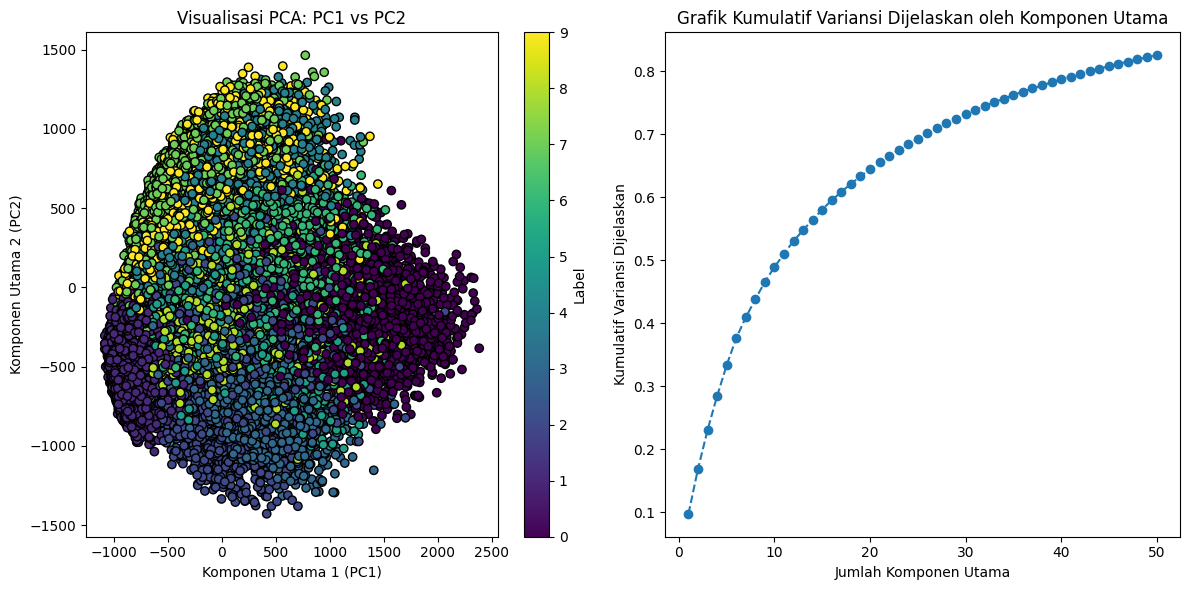

In [57]:
# Visualisasikan komponen utama yang dihasilkan oleh PCA
plt.figure(figsize=(12, 6))

# Tampilkan beberapa komponen utama (komponen ke-0 dan ke-1) sebagai scatter plot
plt.subplot(1, 2, 1)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.colorbar(label='Label')
plt.xlabel('Komponen Utama 1 (PC1)')
plt.ylabel('Komponen Utama 2 (PC2)')
plt.title('Visualisasi PCA: PC1 vs PC2')

# Tampilkan grafik kumulatif dari variansi yang dijelaskan oleh komponen utama
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Kumulatif Variansi Dijelaskan')
plt.title('Grafik Kumulatif Variansi Dijelaskan oleh Komponen Utama')

plt.tight_layout()
plt.show()

**Kesimpulan :**

# 4. Membuat data training dan data testing menggunakan rasio 70:30, 80:20, 90:10

In [58]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = mnist['details']
y = mnist['url']

**Data training dan data testing menggunakan rasio 70:30**

In [59]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=100)

**Data training dan data testing menggunakan rasio 80:20**

In [60]:
# Pembagian data latih dan data uji dengan proporsi 8:2
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=100)

**Data training dan data testing menggunakan rasio 90:10**

In [61]:
# Pembagian data latih dan data uji dengan proporsi 9:1
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=100)

**Kesimpulan :**

# 5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM

# **Naive Bayes 1**

**Training Model**

In [62]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

**Evaluasi Model**

In [63]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.8280164674731134
Hasil akurasi data test: 0.8280648300960602


**Hasil Report Data**

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.8280648300960602
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2418
           1       0.88      0.93      0.91      2417
           2       0.89      0.84      0.86      2349
           3       0.80      0.82      0.81      2396
           4       0.84      0.74      0.79      2388
           5       0.85      0.67      0.75      2326
           6       0.88      0.90      0.89      2333
           7       0.94      0.84      0.89      2342
           8       0.65      0.77      0.71      2319
           9       0.70      0.83      0.76      2343

    accuracy                           0.83     23631
   macro avg       0.83      0.83      0.83     23631
weighted avg       0.84      0.83      0.83     23631



**Hitung Confusing Matrix**

In [66]:
# 1. Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# 2. Tampilkan confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2219    1    7    8    2   31   32    0  118    0]
 [   0 2256   19   18    1    9   15    2   93    4]
 [  33   20 1964   47   28    1  107   23  123    3]
 [  12   28  107 1959    5   47   12   25  127   74]
 [   8    3   11    1 1778    5   49    3  105  425]
 [  62   27   11  277   53 1567   48    6  194   81]
 [  27   52   33    0    9   68 2111    0   32    1]
 [  14   38   14    9   54    2    2 1970   62  177]
 [  13  109   35  118   27  112   13    8 1795   89]
 [  20   18    9   21  151    9    0   67   99 1949]]


# **Naive Bayes 2**

**Training Model**

In [67]:
# Training model
import statsmodels.api as sm

X_train_sm1 = sm.add_constant(X_train1)
lr = sm.OLS(y_train1, X_train_sm1).fit()

**Evaluasi Model**

In [68]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb1 = MultinomialNB()

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb1.fit(X_train1, y_train1)

# Prediksi dengan data training
y_train_pred1 = mnb1.predict(X_train1)

# Evaluasi akurasi training
acc_train1 = accuracy_score(y_train1, y_train_pred1)

# Prediksi test data
y_test_pred1 = mnb1.predict(X_test1)

# Evaluasi model dengan metric akurasi
acc_test1 = accuracy_score(y_test1, y_test_pred1)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train1}')
print(f'Hasil akurasi data test: {acc_test1}')

Hasil akurasi data train: 0.8270439253522914
Hasil akurasi data test: 0.829820997841818


**Hasil Report Data**

In [69]:
from sklearn.metrics import confusion_matrix, classification_report

accuracy1 = accuracy_score(y_test1, y_test_pred1)
report1 = classification_report(y_test1, y_test_pred1)

print(f'Accuracy: {accuracy1}')
print(report1)

Accuracy: 0.829820997841818
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1608
           1       0.88      0.94      0.91      1641
           2       0.89      0.83      0.86      1557
           3       0.79      0.81      0.80      1616
           4       0.85      0.75      0.80      1568
           5       0.85      0.67      0.75      1560
           6       0.88      0.91      0.90      1545
           7       0.94      0.85      0.89      1544
           8       0.67      0.77      0.72      1585
           9       0.69      0.83      0.76      1530

    accuracy                           0.83     15754
   macro avg       0.84      0.83      0.83     15754
weighted avg       0.84      0.83      0.83     15754



**Hitung Confusing Matrix**

In [70]:
# 1. Hitung confusion matrix
conf_matrix1 = confusion_matrix(y_test1, y_test_pred1)

# 2. Tampilkan confusion matrix
print("Confusion Matrix:")
print(conf_matrix1)

Confusion Matrix:
[[1487    0    4    3    1   20   16    0   77    0]
 [   0 1544   13   14    0    4   10    1   53    2]
 [  21   12 1295   34   17    1   70   16   89    2]
 [  10   20   72 1313    4   37    8   16   84   52]
 [   7    2    6    1 1177    3   31    2   63  276]
 [  47   16    8  193   36 1047   37    4  122   50]
 [  19   37   15    0    5   44 1401    0   23    1]
 [   7   27    7    7   32    2    1 1308   28  125]
 [   7   81   24   79   22   66   10    5 1225   66]
 [  16   10    7   17   94    7    0   41   62 1276]]


# **Naive Bayes 3**

**Training Model**

In [71]:
# Training model
import statsmodels.api as sm

X_train_sm2 = sm.add_constant(X_train2)
lr = sm.OLS(y_train2, X_train_sm2).fit()

**Evaluasi Model**

In [72]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb2 = MultinomialNB()

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb2.fit(X_train2, y_train2)

# Prediksi dengan data training
y_train_pred2 = mnb2.predict(X_train2)

# Evaluasi akurasi training
acc_train2 = accuracy_score(y_train2, y_train_pred2)

# Prediksi test data
y_test_pred2 = mnb2.predict(X_test2)

# Evaluasi model dengan metric akurasi
acc_test2 = accuracy_score(y_test2, y_test_pred2)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train2}')
print(f'Hasil akurasi data test: {acc_test2}')

Hasil akurasi data train: 0.8276416571452753
Hasil akurasi data test: 0.8273454360797258


**Hasil Report Data**

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

accuracy2 = accuracy_score(y_test2, y_test_pred2)
report2 = classification_report(y_test2, y_test_pred2)

print(f'Accuracy: {accuracy2}')
print(report2)

Accuracy: 0.8273454360797258
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       805
           1       0.88      0.94      0.91       819
           2       0.89      0.83      0.86       796
           3       0.78      0.81      0.79       805
           4       0.84      0.76      0.80       797
           5       0.84      0.67      0.75       766
           6       0.89      0.92      0.90       759
           7       0.93      0.84      0.88       798
           8       0.66      0.76      0.71       762
           9       0.68      0.81      0.74       770

    accuracy                           0.83      7877
   macro avg       0.83      0.83      0.83      7877
weighted avg       0.83      0.83      0.83      7877



**Hitung Confusing Matrix**

In [74]:
# 1. Hitung confusion matrix
conf_matrix2 = confusion_matrix(y_test2, y_test_pred2)

# 2. Tampilkan confusion matrix
print("Confusion Matrix:")
print(conf_matrix2)

Confusion Matrix:
[[743   0   3   1   1  11   9   0  37   0]
 [  0 773   5   7   0   2   4   1  26   1]
 [ 14   8 662  18   9   0  36   6  43   0]
 [  2  11  41 652   3  22   3   8  43  20]
 [  3   0   4   1 609   1  11   1  33 134]
 [ 20   9   2 102  19 516  16   5  55  22]
 [  9  16   7   0   4  17 695   0  11   0]
 [  3  15   2   2  17   2   1 667  17  72]
 [  4  39  11  43   9  34   5   2 576  39]
 [  8   5   5  14  52   6   0  26  30 624]]


**Kesimpulan :**

# **SVM**

**Import Library**

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

**Kesimpulan :**

# 6. Evaluasi model yang Anda buat terhadap data training dan data testing

# **Naive Bayes**

**Evaluasi Model Naive Bayes 1**

In [ ]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

**Evaluasi Model Naive Bayes 2**

In [ ]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb1 = MultinomialNB()

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb1.fit(X_train1, y_train1)

# Prediksi dengan data training
y_train_pred1 = mnb1.predict(X_train1)

# Evaluasi akurasi training
acc_train1 = accuracy_score(y_train1, y_train_pred1)

# Prediksi test data
y_test_pred1 = mnb1.predict(X_test1)

# Evaluasi model dengan metric akurasi
acc_test1 = accuracy_score(y_test1, y_test_pred1)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train1}')
print(f'Hasil akurasi data test: {acc_test1}')

**Evaluasi Model Naive Bayes 3**

In [ ]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb2 = MultinomialNB()

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb2.fit(X_train2, y_train2)

# Prediksi dengan data training
y_train_pred2 = mnb2.predict(X_train2)

# Evaluasi akurasi training
acc_train2 = accuracy_score(y_train2, y_train_pred2)

# Prediksi test data
y_test_pred2 = mnb2.predict(X_test2)

# Evaluasi model dengan metric akurasi
acc_test2 = accuracy_score(y_test2, y_test_pred2)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train2}')
print(f'Hasil akurasi data test: {acc_test2}')

# **SVM**

**Evaluasi Model SVM 1**

**Evaluasi Model SVM 2**

**Evaluasi Model SVM 3**

**Kesimpulan :**

# 7. Tampilkan citra data testing berserta hasil pelabelannya

# **Naive Bayes**

**Citra Data Testing Naive Bayes 1**

**Citra Data Testing Naive Bayes 2**

**Citra Data Testing Naive Bayes 3**

# **SVM**

**Citra Data Testing SVM 1**

**Citra Data Testing SVM 2**

**Citra Data Testing SVM 3**

**Kesimpulan :**

# 8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

## Jawabannya :
